In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# **Simple Linear Regression (SLR)**

Simple Linear Regression is a supervised learning algorithm that models the relationship between one independent variable (X) and one dependent variable (Y) using a straight line.

Equation of Simple Linear Regression:
𝑌
=
𝑚
𝑋
+
𝑐
+
𝜖
Y=mX+c+ϵ

Where:

Y = Dependent variable (Target)

X = Independent variable (Feature)

m = Slope (Coefficient)

c = Intercept (Constant)

ϵ = Error term (Residuals)


In [2]:
# Example dataset (Salary vs Experience)
data = {'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Salary': [30000, 35000, 40000, 45000, 50000, 60000, 65000, 70000, 75000, 80000]}

df = pd.DataFrame(data)
X = df[['Experience']]  # Independent Variable
y = df['Salary']  # Dependent Variable

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Mean Squared Error: 46447.68133174533
R-squared Score: 0.9998838807966707
Slope (m): 5775.862068965516
Intercept (c): 23232.75862068966


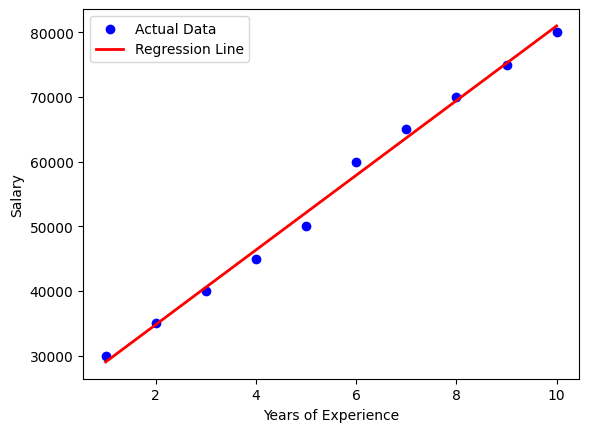

In [8]:
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# **Insights**

The red line represents the best-fit line found by the model.

The Mean Squared Error (MSE) indicates how well the model predicts.

The R-squared score (R²) measures how much variance in Y is explained by X.

The Slope (m) shows how much Salary increases for each additional year of experience.

# **Multiple Linear Regression (MLR)**

Multiple Linear Regression is an extension of Simple Linear Regression, where we have multiple independent variables predicting the dependent variable.

🔹 Equation of Multiple Linear Regression
𝑌
=
𝑚
1
𝑋
1
+
𝑚
2
𝑋
2
+
.
.
.
+
𝑚
𝑛
𝑋
𝑛
+
𝑐+e

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Creating a dataset
data = {'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Test_Score': [60, 65, 70, 75, 80, 85, 90, 95, 98, 100],
        'Salary': [30000, 35000, 40000, 45000, 50000, 60000, 65000, 70000, 75000, 80000]}

df = pd.DataFrame(data)

# Independent Variables (Features)
X = df[['Experience', 'Test_Score']]

# Dependent Variable (Target)
y = df['Salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Coefficients (m1, m2):", model.coef_)
print("Intercept (c):", model.intercept_)

Mean Squared Error: 142779.15882826486
R-squared Score: 0.9996430521029294
Coefficients (m1, m2): [4036.8852459   377.04918033]
Intercept (c): 1926.2295081968332


In [15]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(feature_importance)

      Feature  Coefficient
0  Experience  4036.885246
1  Test_Score   377.049180


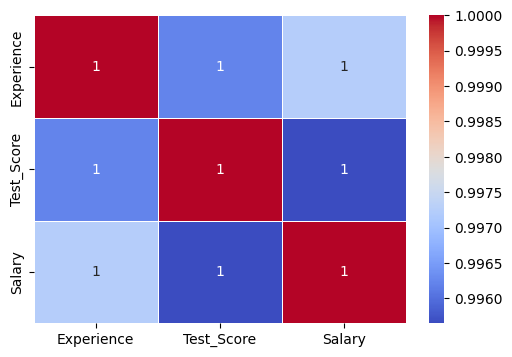

In [16]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [19]:
from sklearn.feature_selection import RFE

# Initialize model
model = LinearRegression()

# Apply RFE with 1 best feature (change n_features_to_select as needed)
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)

# Print feature ranking
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(feature_ranking.sort_values(by="Ranking"))

      Feature  Ranking
0  Experience        1
1  Test_Score        2


In [20]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_)})
print(importance.sort_values(by="Importance", ascending=False))

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # Adjust alpha (higher = more regularization)
ridge.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [1650.14806309  888.37855805]
Ridge Intercept: -26811.808787091228


In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Lasso Coefficients:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)

Lasso Coefficients: [4038.71218669  376.65659353]
Lasso Intercept: 1948.3243778012838


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge tuning
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train, y_train)
print("Best Ridge Alpha:", ridge_cv.alpha_)

# Lasso tuning
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5)
lasso_cv.fit(X_train, y_train)
print("Best Lasso Alpha:", lasso_cv.alpha_)

Best Ridge Alpha: 0.1
Best Lasso Alpha: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde